In [1]:
import numpy as np
import pandas as pd
from TDABC import *
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
from sklearn.model_selection import RepeatedStratifiedKFold
import csv
import seaborn as sns
dataset = pd.DataFrame(pd.read_csv('ionosphere.csv'))
name='ionosphere'

dataset[dataset.columns[1:-1]]=dataset[dataset.columns[1:-1]].replace(0,np.nan)

for var in dataset.columns[:-1]:
    temp = dataset[dataset[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    temp=np.array(temp[var])
    print(temp)
    dataset.loc[(dataset['Outcome'] == 0 ) & (dataset[var].isnull()), var] = temp[0]
    dataset.loc[(dataset['Outcome'] == 1 ) & (dataset[var].isnull()), var] = temp[1]

In [2]:
data=np.array(dataset)[:,:-1]
Lab=np.array(dataset)[:,-1]
kF = RepeatedStratifiedKFold(n_splits=10,n_repeats=5)
matrices=[]     

In [3]:
dataset

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


X,Y=Benchmark(data,Lab,3,10,'A',10,0.2)
print(accuracy_score(X,Y))
print(confusion_matrix(X, Y,normalize='true'))

In [4]:
for p in [4]:
    for mode in ['R','A','M']:    
        real=[]
        predicted=[]
        for train_i, test_i in kF.split(data,Lab):
            X_train, X_test = data[train_i], data[test_i]
            ytrain, ytest = Lab[train_i], Lab[test_i]
            pred=Predict3(X_train,X_test, ytrain,p,mode)
            real=np.append(real,ytest)
            predicted=np.append(predicted,pred)
        confusion=confusion_matrix(real,predicted)
        FP = confusion.sum(axis=0) - np.diag(confusion)  
        FN = confusion.sum(axis=1) - np.diag(confusion)
        TP = np.diag(confusion)
        TN = confusion.sum() - (FP + FN + TP)
        FP = FP.astype(float)
        FN = FN.astype(float)
        TP = TP.astype(float)
        TN = TN.astype(float)
        # Sensitivity, hit rate, recall, or true positive rate
        TPR = np.mean(TP/(TP+FN))
        # Specificity or true negative rate
        TNR = np.mean(TN/(TN+FP)) 
        # Precision or positive predictive value
        PPV = np.mean(TP/(TP+FP))
        # Negative predictive value
        NPV = np.mean(TN/(TN+FN))
        # Fall out or false positive rate
        FPR = np.mean(FP/(FP+TN))
        # False negative rate
        FNR = np.mean(FN/(TP+FN))
        # False discovery rate
        FDR = np.mean(FP/(TP+FP))
        # Overall accuracy
        ACC = np.mean((TP+TN)/(TP+FP+FN+TN))
        F1=f1_score(real,predicted,average='macro')
        fields=[TPR,TNR,PPV,NPV,FPR,FNR,FDR,F1,ACC,name,"TDABC-"+mode]
        with open(r'comparefinal.csv', 'a+', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(fields)
        confusion= confusion_matrix(real, predicted,normalize='true')
        matrices.append((confusion,mode))

In [5]:
matrices

[(array([[0.96666667, 0.03333333],
         [0.25333333, 0.74666667]]),
  'R'),
 (array([[0.96984127, 0.03015873],
         [0.20533333, 0.79466667]]),
  'A'),
 (array([[0.97936508, 0.02063492],
         [0.24888889, 0.75111111]]),
  'M')]

<AxesSubplot:>

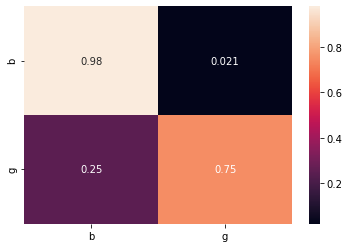

In [9]:
sns.heatmap(matrices[2][0], annot=True, xticklabels=np.unique(Lab), yticklabels=np.unique(Lab))

[[1.  , 0.  , 0.  ],[0.04, 0.92, 0.04],[0.14, 0.08, 0.78]]